TESS

* [ETE-6 TESS Simulated Data Products](http://archive.stsci.edu/tess/ete-6.html)
* [Data Product Summary](https://archive.stsci.edu/tess/all_products.html)

* [TESS Candidate Target List (CTL) filtergraph](https://filtergraph.com/tess_ctl)
* [CTL download](http://astro.phy.vanderbilt.edu/~oelkerrj/tic6_ctl_20180108.tar.gz)

* [K2-TESS Catalog filtergraph](https://filtergraph.com/tess_k2campaigns)

Naming convention

| Data Type | Naming Convention |
|:-----------|:-------------------|
|Uncalibrated full frame image | tessyyyydddhhmmss-cam-ccd-scid-cr_ffir.fits.gz |
|Calibrated full frame image   | tessyyyydddhhmmss-cam-ccd-scid-cr_ffic.fits.gz |
|Target pixels                 | tessyyyydddhhmmss-tid-scid-cr_tp.fits.gz       |
|Light curves                  | tessyyyydddhhmmss-tid-scid-cr_lc.fits.gz       |
|Collateral target pixel files | tessyyyydddhhmmss-type-cam-ccd-output-scid-cr_col.fits.gz |
|Cotrending basis vectors      | tessyyyydddhhmmss-cam-ccd-scid-cr_cbv.fits     |
|Full data validation report   | tessyyyydddhhmmss-tid-pin_dvr.pdf              |
|TCE summary report            | tessyyyydddhhmmss-tid-pn-pin_dvs.pdf |
|Data validation results       | tessyyyydddhhmmss-tid-pin_dvr.xml.gz |
|DV Results XML Schema Definition | tessyyyydddhhmmss_dvr.xsd         |
|Data validation time series      | tessyyyydddhhmmss-tid-pin_dvt.fits.gz |

[Definitions](https://archive.stsci.edu/missions/tess/doc/EXP-TESS-ARC-ICD-TM-0014.pdf)

* Full Frame Image (FFI) file 
 - contains all the pixels on a single CCD. These are full images as opposed to sparse images that would be generated if only the target pixels were collected. If a pixel has an unknown value it will be filled with -1 if it is an integer data type else it will be filled with a NaN. Although we expect to have all the pixels in an image, it’s possible due to spacecraft anomalies, data transmission problems or unforeseen issues that not all pixels will be available. There are three types of FFI images that will be delivered: uncalibrated, calibrated and uncertainty. The uncalibrated image is the uncalibrated pixel data taken from the spacecraft; it uses 32-bit, signed integers as its pixel value. The calibrated image will contain the calibrated pixels as single precision (32-bit) floating point values. The uncertainty image will contain the uncertainty in the calibrated pixel values as single precision floating point to encode pixel values. The calibrated image and its associated uncertainty image are stored in the same file. 
* target pixel files 
 - contain all the pixels collected for one target during a sector (two space craft orbits). If a target was observed in more than one sector then multiple files will be created for the target, but they may be delivered in separate deliveries. The images represented in the file have the dimensions of the bounding box of the pixels that were collected. As a result, there may be pixels in the images stored in these files that were never collected.
* Lght Curve Files
 - contain the output of the photometric analysis and subsequent cotrending as applied to the light curve. A single file contains the light curves for one target for one sector (two orbits). If a target was observed in more than one sector then multiple files will be created, but these may be delivered in separate deliveries
* aperture mask image HDU
 - indicates the pixels that were collected for a target and which of those pixels were used for photometry. Target pixel files and light curve files each contain one of these
* cotrending basis vectors (CBVs) 
 - represent the set of systematic trends present in the ensemble light curve data for each CCD. Specifically, these are the U matrix, aka the left singular vectors, of an singular value decomposition (SVD) performedon an ensemble of light curves. A light curve user may fit the CBVs to light curves to remove the common instrumental effects from the data when the Pre-search Data Conditioning (PDC) light curve (see table 13) is insuffic
* Threshold Crossing Event (TCE) 
 - is a detection made by the Transiting Planet Search (TPS) algorithm. It represents a statistically significant periodic, transit-like dimming of the target star. The significance of the detection when folded at the detected orbital period is known as the multiple event statistic (MES). Data validation, a SPOC software component, is often referred to as DV. TPS and DV operate on light curves generated by Presearch Data Conditioning (PDC). 

Target Pixel Files, Extracted Light Curves, Data Validation Files

Programmatic Access

A total of 15,000 Target Pixel Files and Extracted Light Curves are provided with ETE-6. A subset of these simulated files have associated Data Validation files (2,734 Threshold Crossing Event (TCE) Summary Reports, 1,903 Full Data Validation Reports and Data Validation Time Series). The files are sorted into the following directory structure:

`<TID[0:1]>/<TID[2:4]>/<TID[5:7]>/<TID[8:10]>/`

The directory structure is entirely defined by the TESS Input Catalog number (TID). The TID is a 16-digit unique identifier of a given TESS target. Each subdirectory is broken up into 1000-length bits. Here is an example path to the files for TIC ID 0000000471012795, which you can use in your wget or cURL commands:

`https://archive.stsci.edu/missions/tess/ete-6/tid/00/000/004/710/`

In [1]:
from glob import glob
fileloc = '/home/jp/data/transit/tess/'

file_list = glob(fileloc+'*.fits')
file_list.sort()

In [2]:
from astropy.io import fits

n=10
with fits.open(file_list[n]) as fdu_list:
    fdu_list.info()

Filename: /home/jp/data/transit/tess/tess2019128220341-0000000310061389-0016-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  LIGHTCURVE    1 BinTableHDU    166   20610R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (11, 11)   int32   


## get lightcurve

In [5]:
with fits.open(file_list[n]) as fdu_list:
    #get lightcurve data
    data = fdu_list[1].data

In [6]:
data.__dict__

{'_col_weakrefs': <_weakrefset.WeakSet at 0x7efcc93fdb38>, '_coldefs': ColDefs(
     name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
     name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
     name = 'CADENCENO'; format = 'J'; disp = 'I10'
     name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
     name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
     name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
     name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
     name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
     name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
     name = 'QUALITY'; format = 'J'; disp = 'B16.16'
     name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
     name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
     name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
     name = 'PSF_CENTR2_ERR'; 

## convenience functions

In [7]:
data=fits.getdata(file_list[n])
hdr =fits.getheader(file_list[n])

In [8]:
t = data['TIME']
f = data['SAP_FLUX']
e = data['SAP_FLUX_ERR']
b = data['SAP_BKG']

x1 = data['POS_CORR1']
x2 = data['POS_CORR2']

Text(0.5,0,'time')

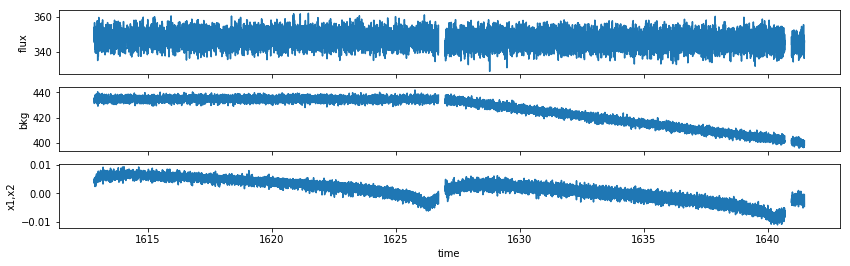

In [9]:
import matplotlib.pyplot as pl
%matplotlib inline

fig, ax = pl.subplots(3,1,figsize=(14,4), sharex=True)
n=0
ax[n].plot(t,f)
ax[n].set_ylabel('flux')
n=1
ax[n].plot(t,b)
ax[n].set_ylabel('bkg')
n=2
#ax[n].plot(t,x1)
ax[n].plot(t,x2)
ax[n].set_ylabel('x1,x2')

ax[-1].set_xlabel('time')

## get aperture

In [10]:
with fits.open(file_list[n]) as fdu_list:
    #get aperture data
    aper = fdu_list[2].data

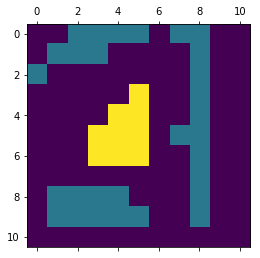

In [11]:
import matplotlib.pyplot as pl
%matplotlib inline

pl.matshow(aper)

## inspect all

In [12]:
obj = []
for i in file_list:
    #get lightcurve
    hdr=fits.getheader(i)
    obj.append(hdr['OBJECT'])

In [14]:
def get_data(data):
    t = data['TIME']
    f = data['SAP_FLUX']
    e = data['SAP_FLUX_ERR']
    b = data['SAP_BKG']

    x1 = data['POS_CORR1']
    x2 = data['POS_CORR2']
    return t,f,e,b,x1,x2

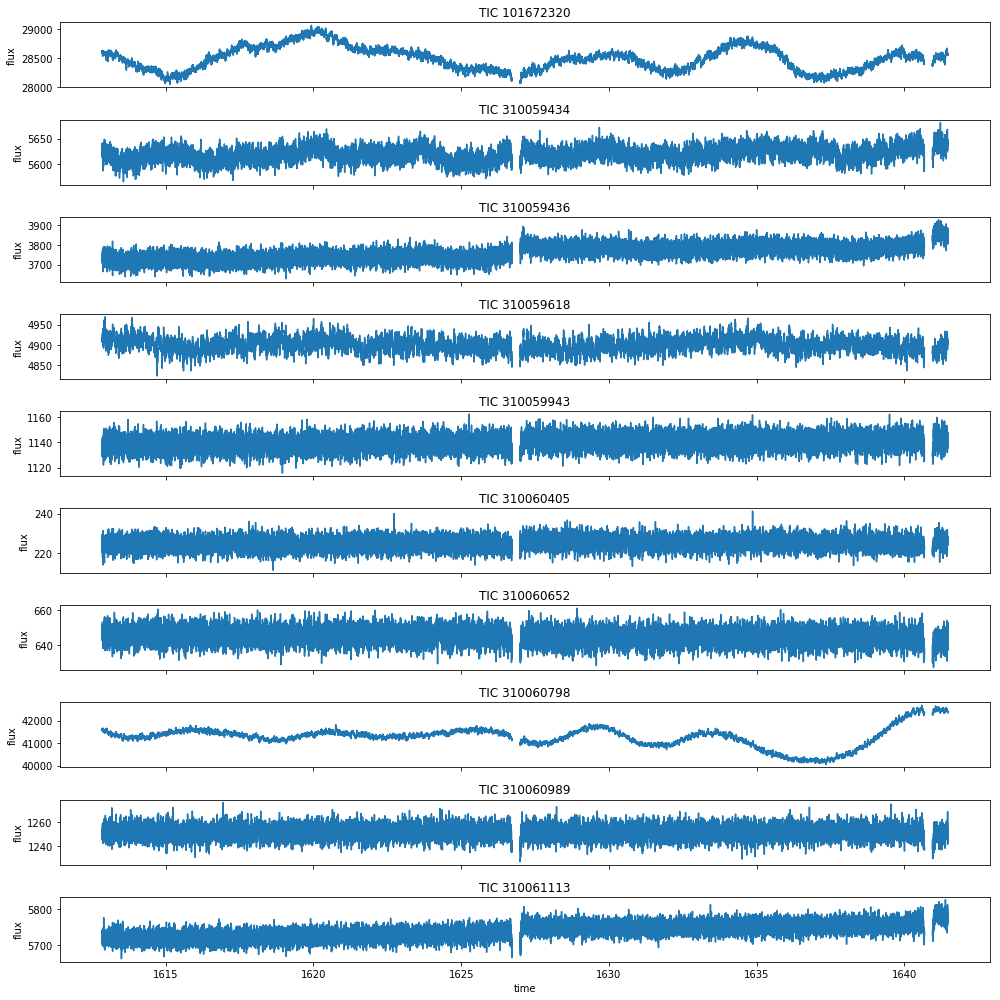

In [16]:
m=10

fig, ax = pl.subplots(m,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

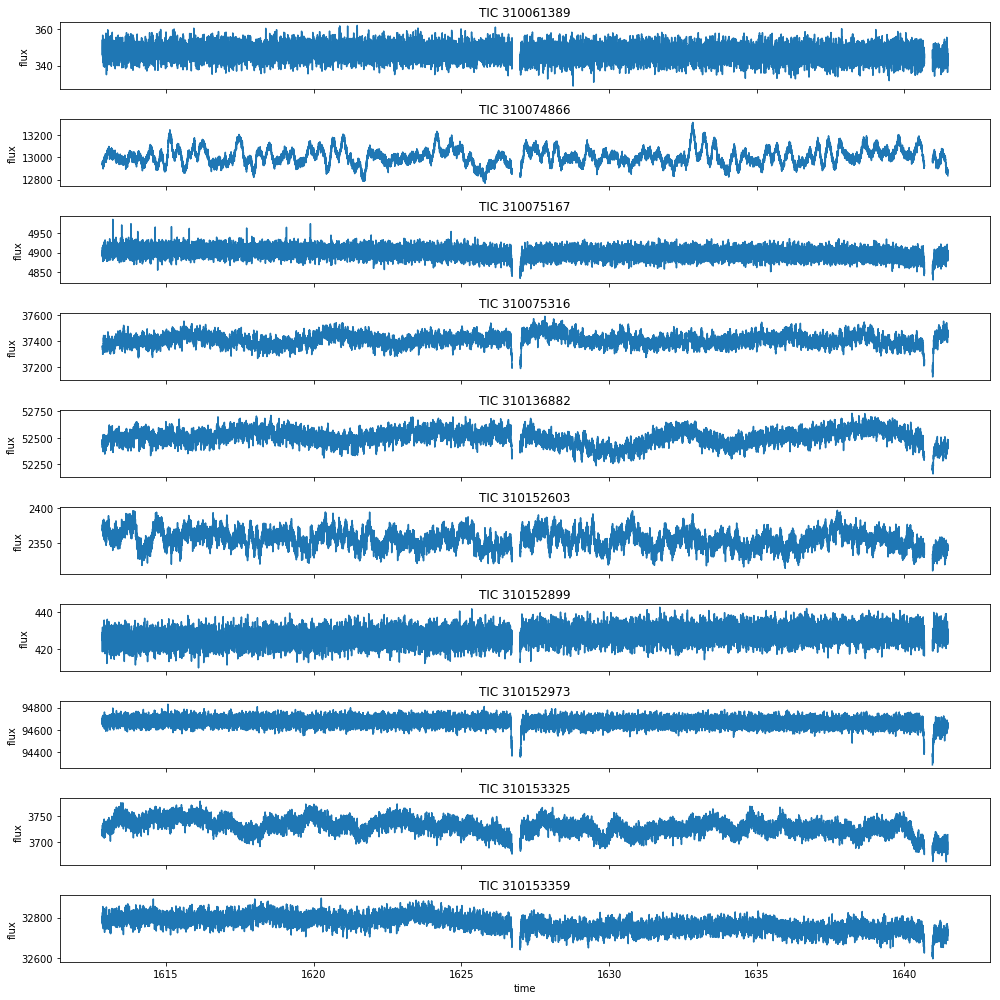

In [18]:
m=20

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

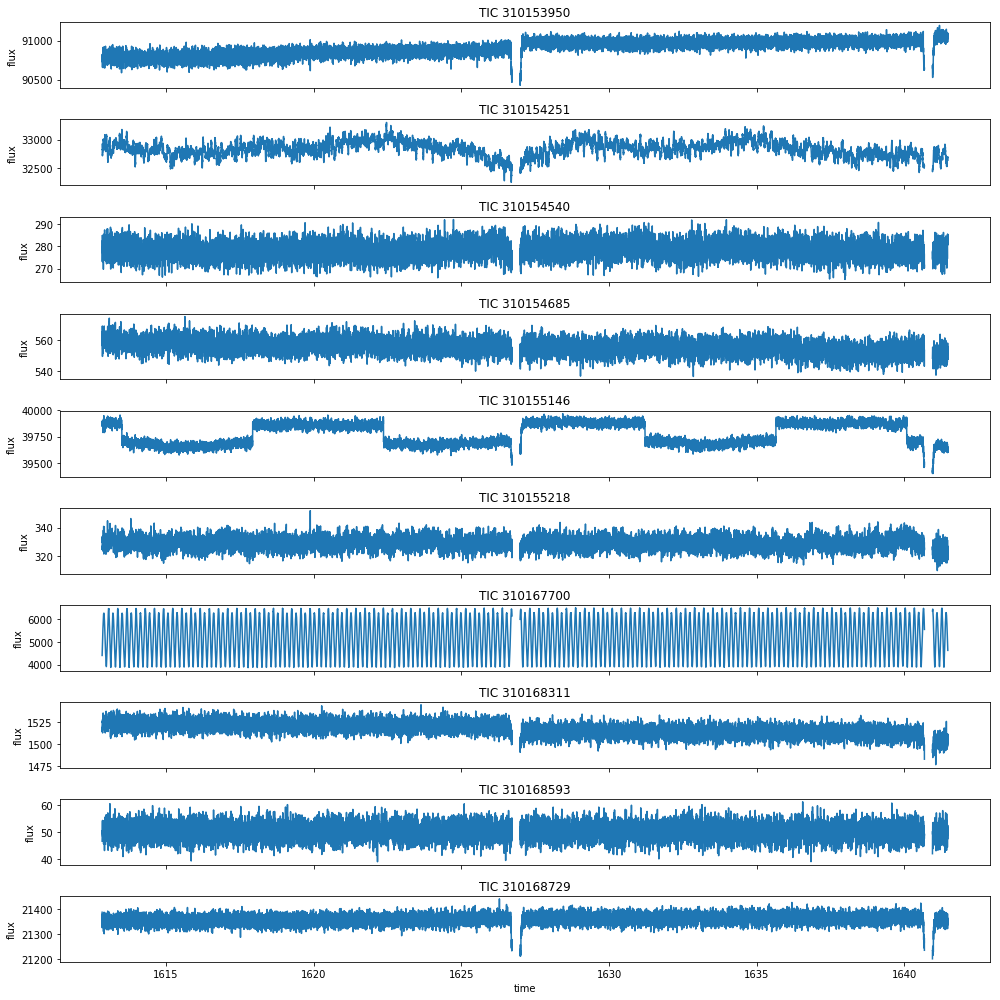

In [19]:
m=30

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

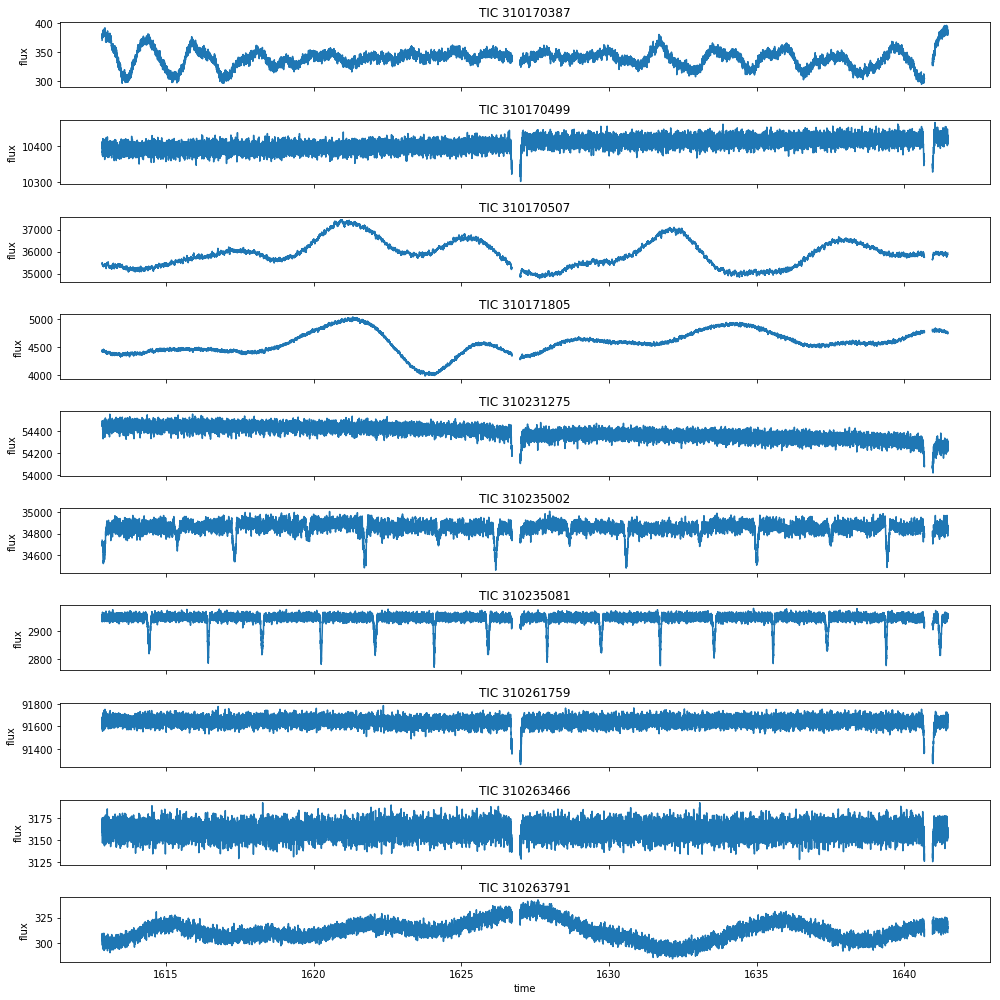

In [20]:
m=40

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

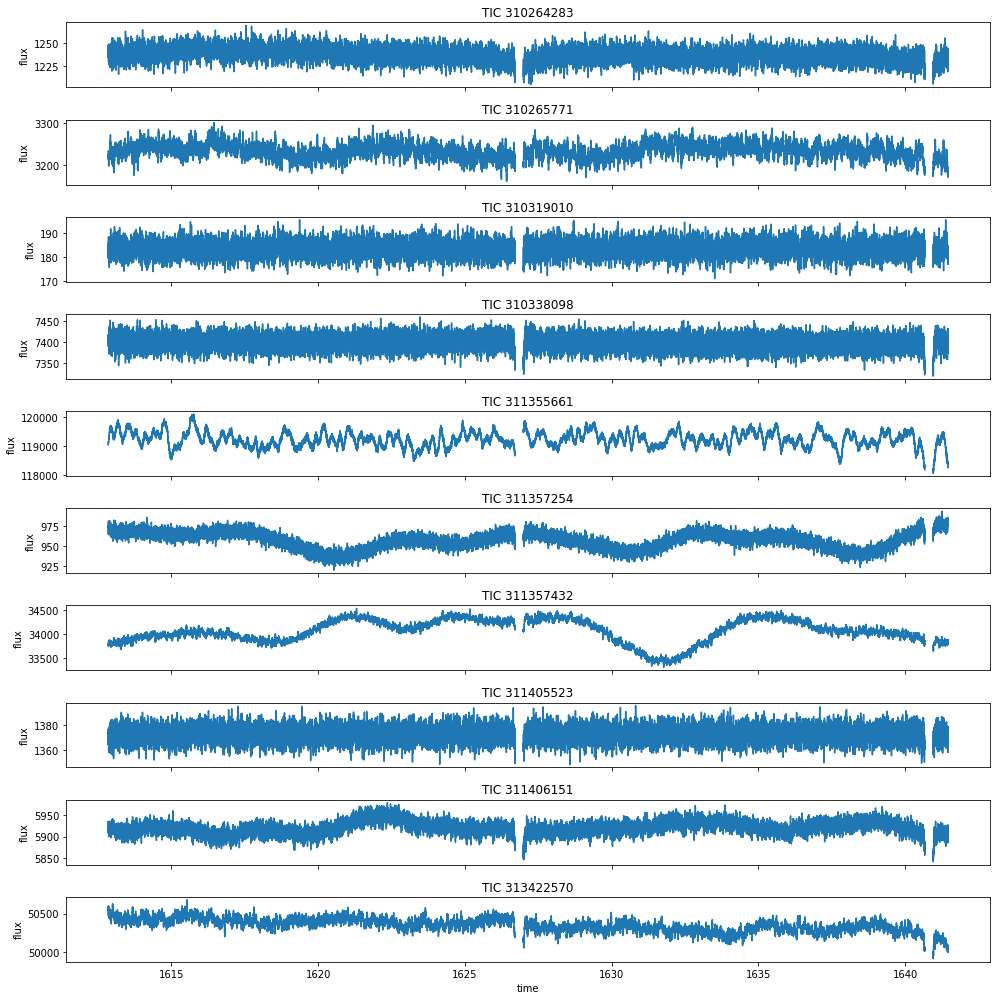

In [21]:
m=50

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

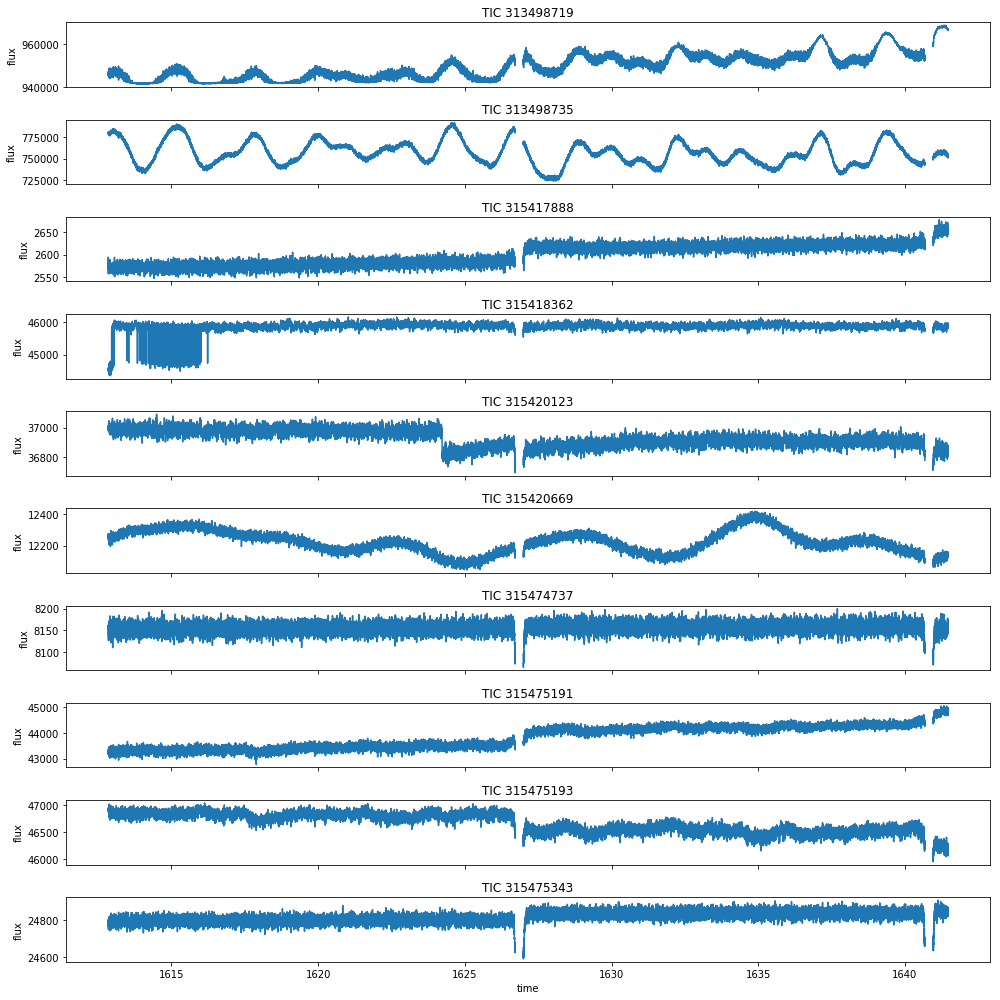

In [23]:
m=70

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

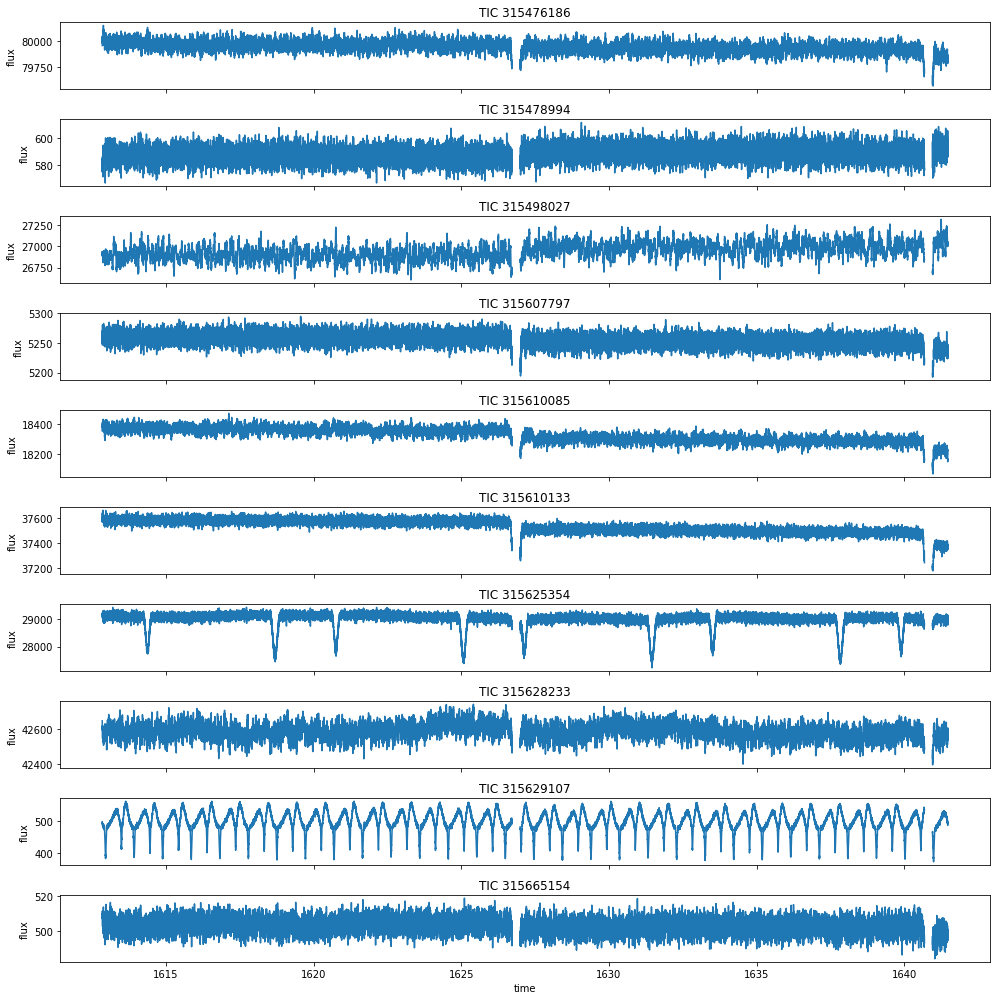

In [24]:
m=80

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

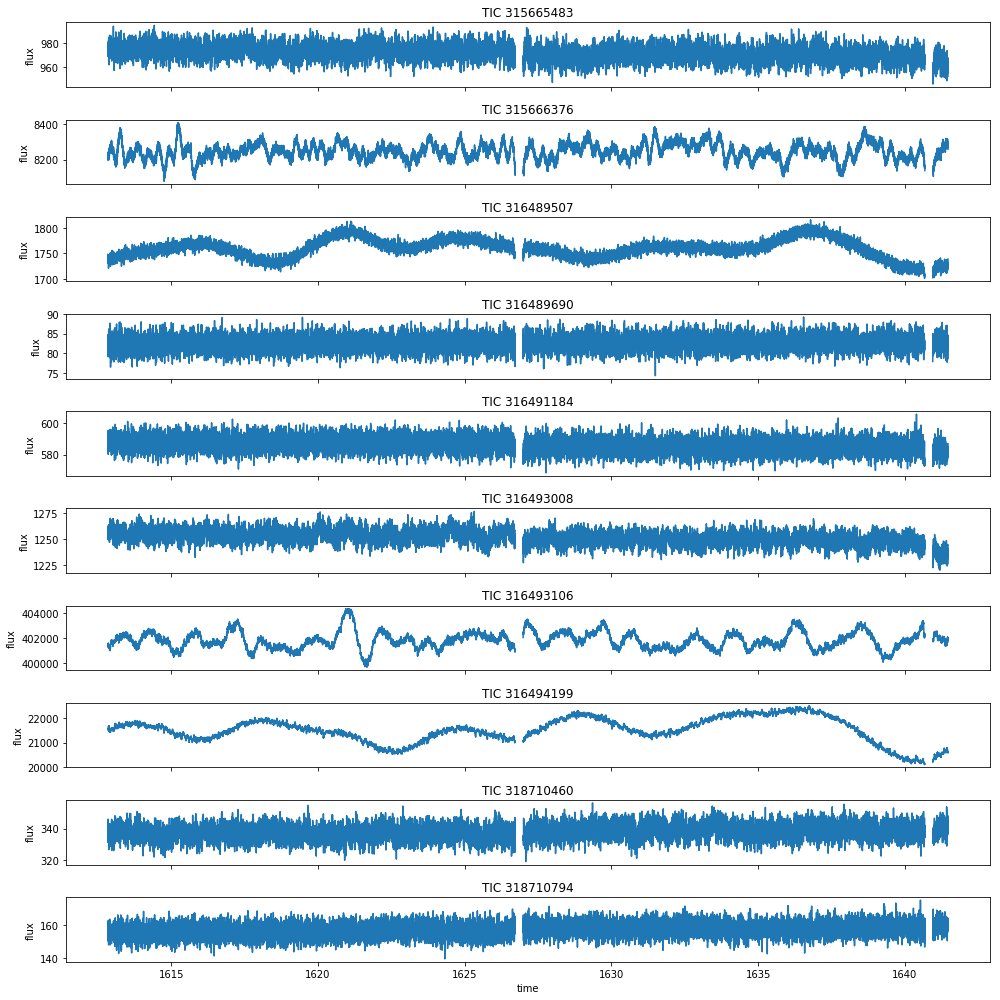

In [25]:
m=90

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

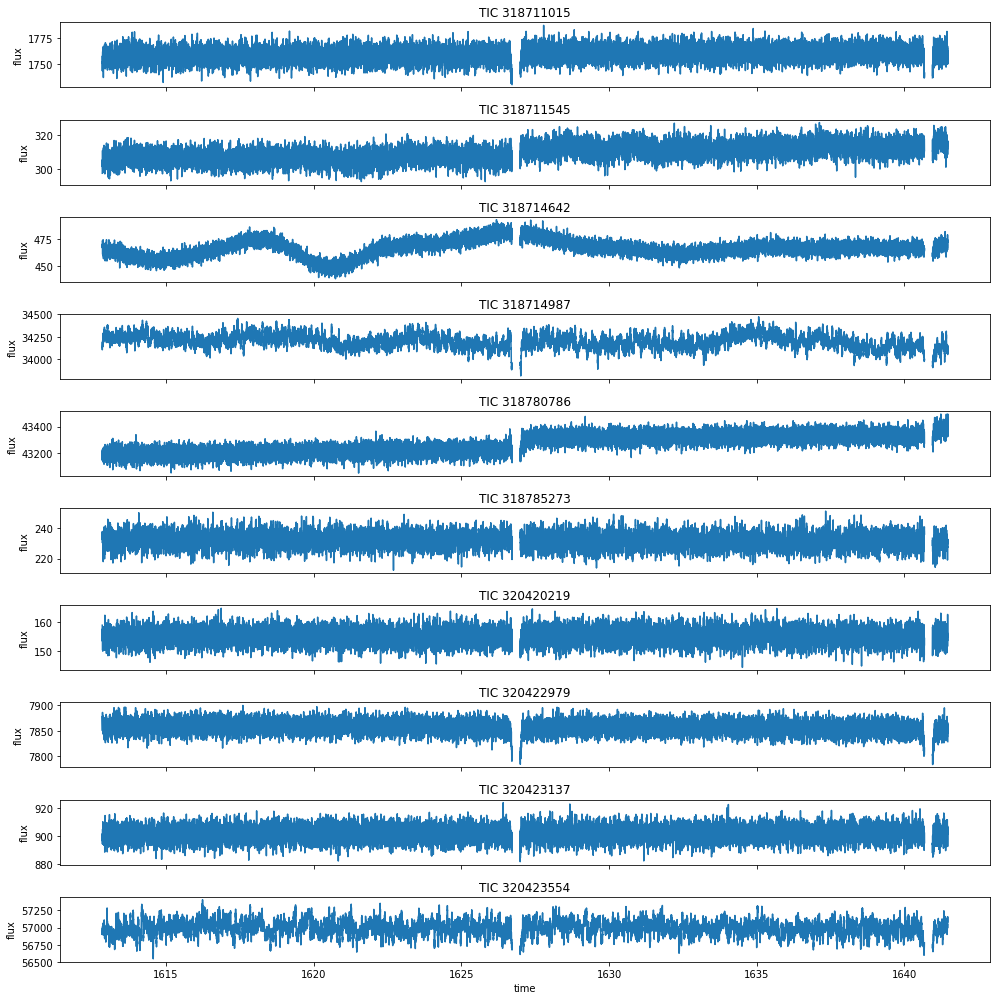

In [26]:
m=100

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

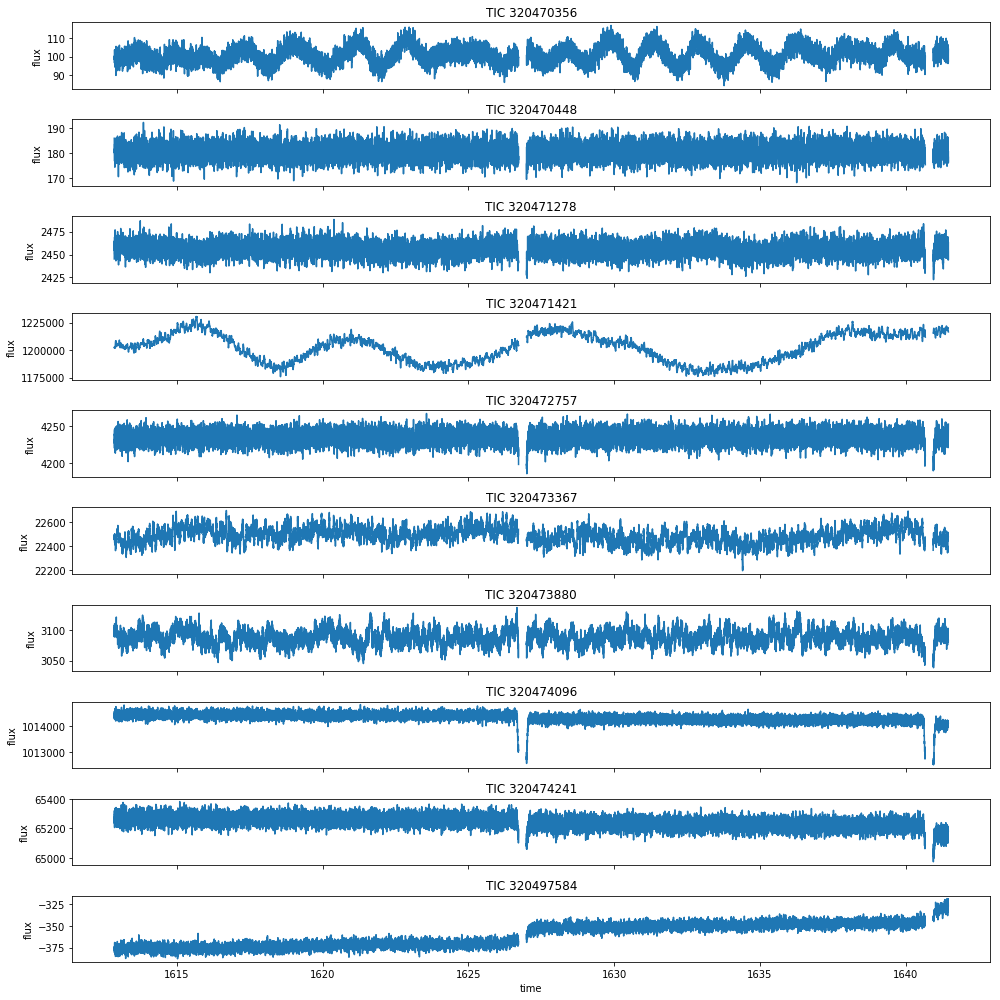

In [27]:
m=110

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

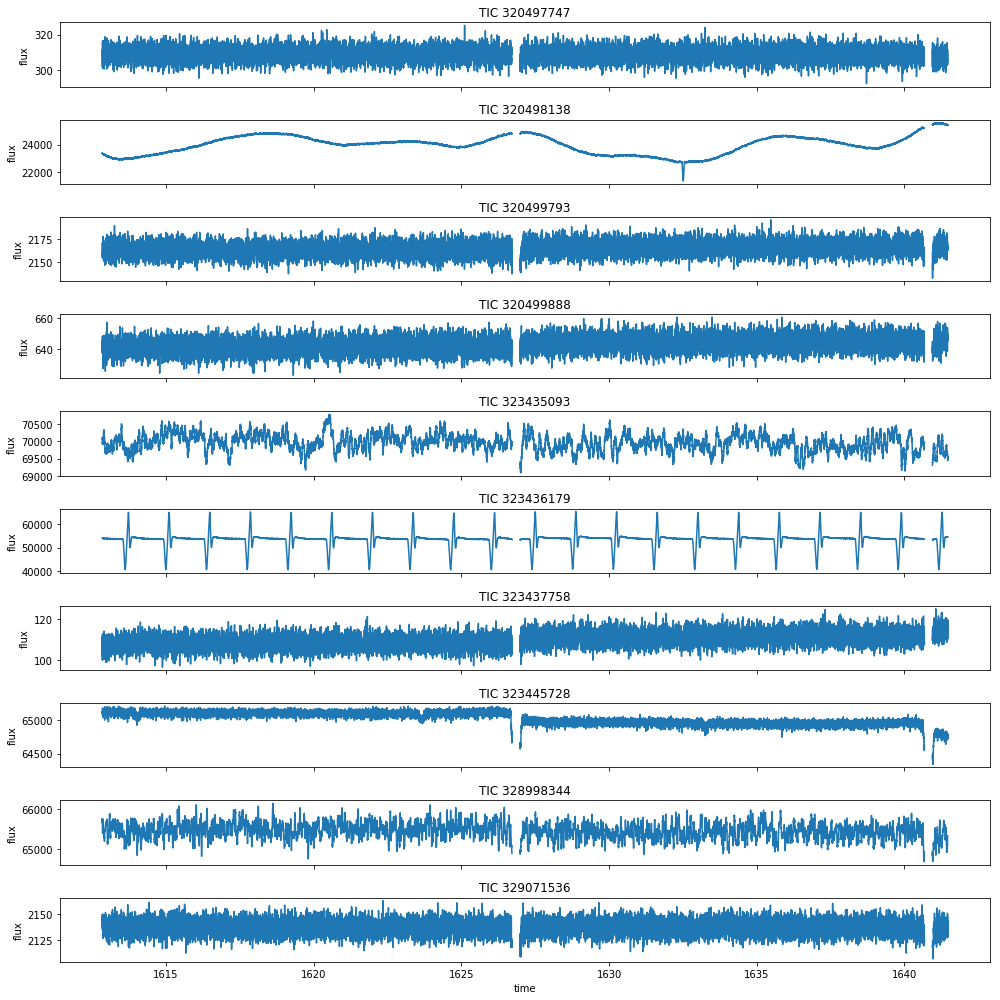

In [29]:
m=120

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

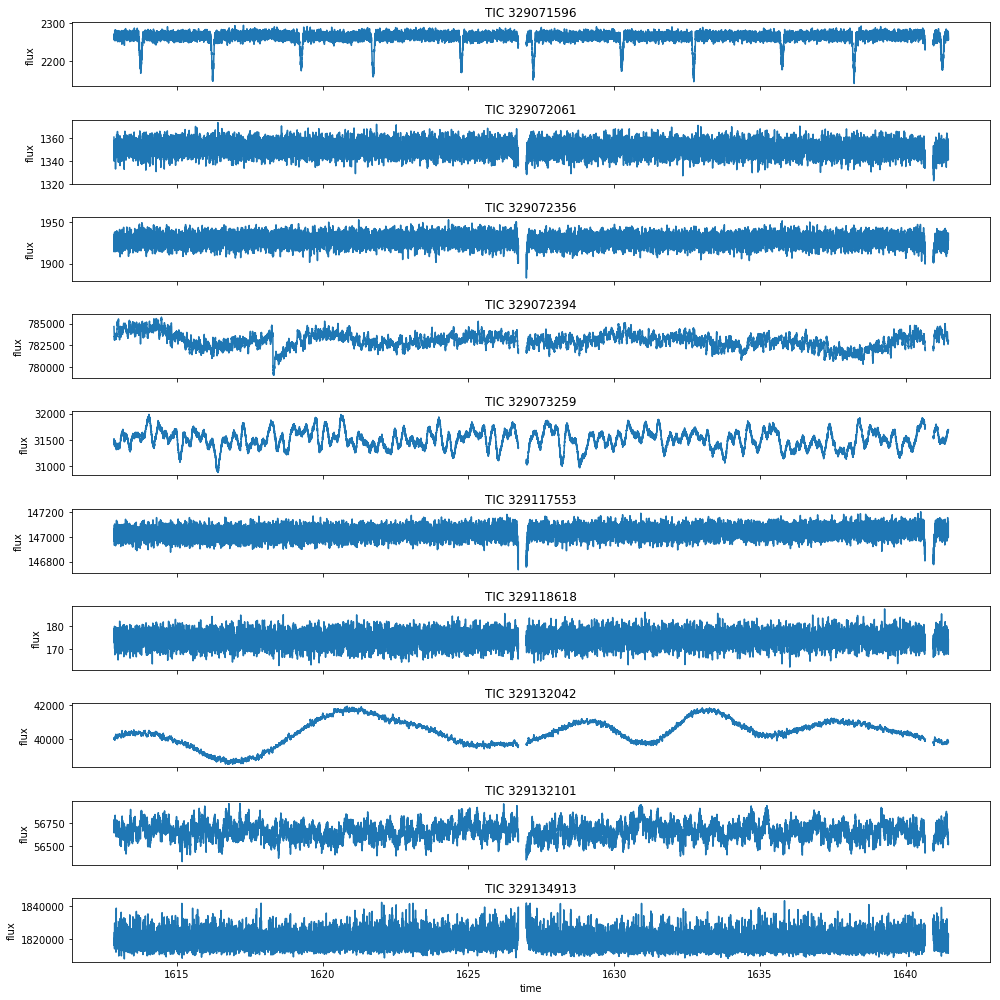

In [30]:
m=130

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

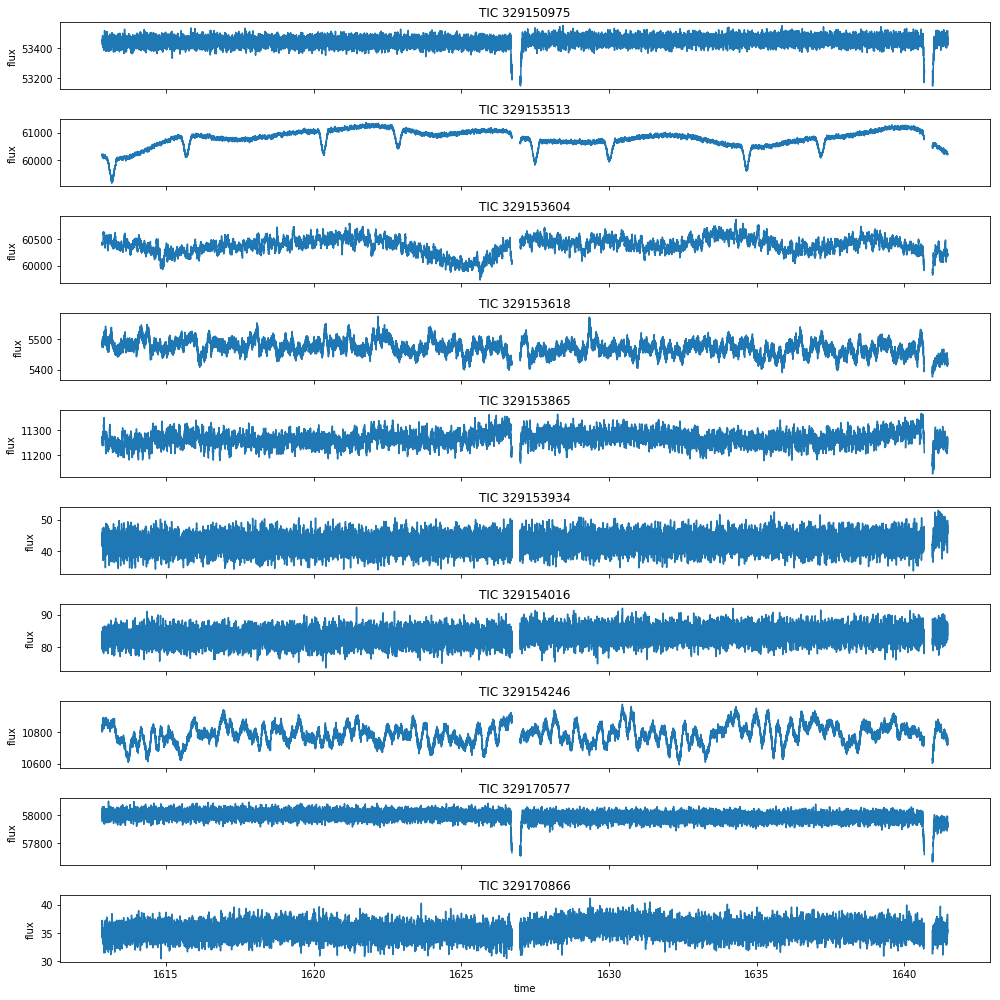

In [31]:
m=140

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

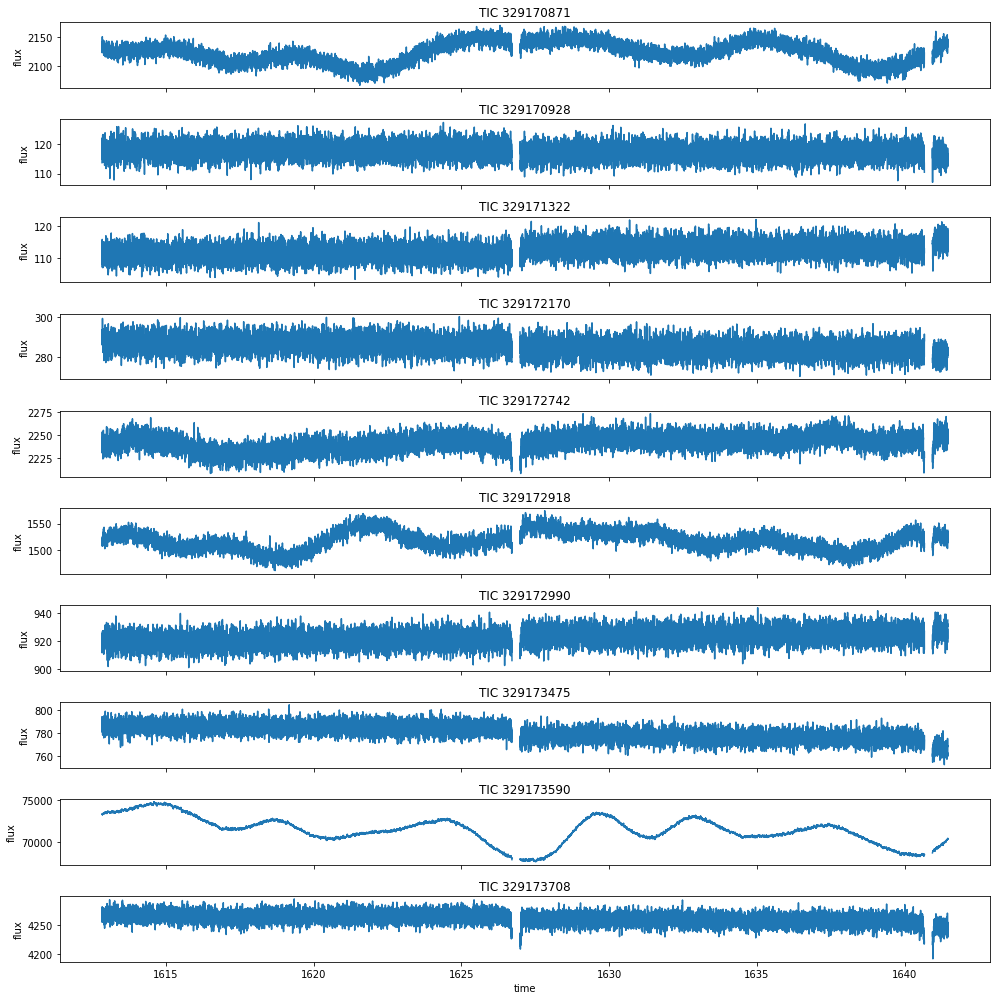

In [32]:
m=150

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

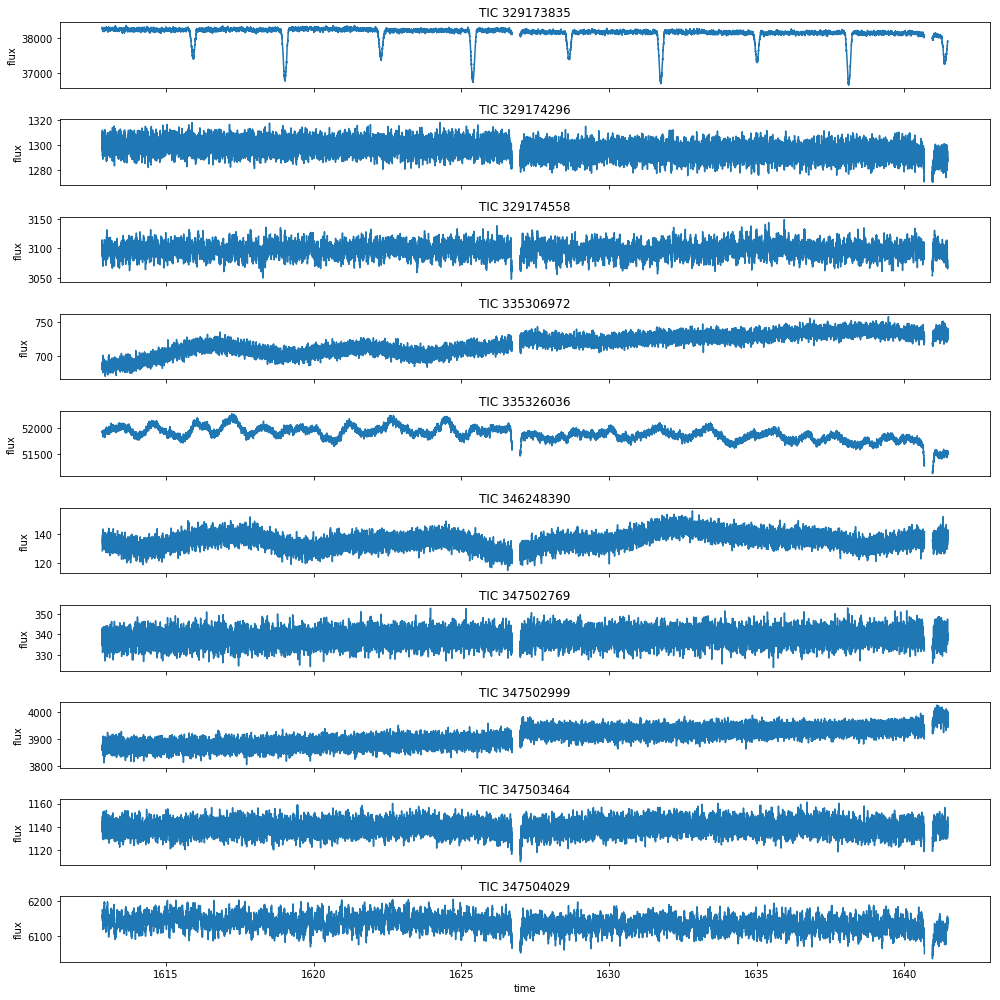

In [33]:
m=160

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()

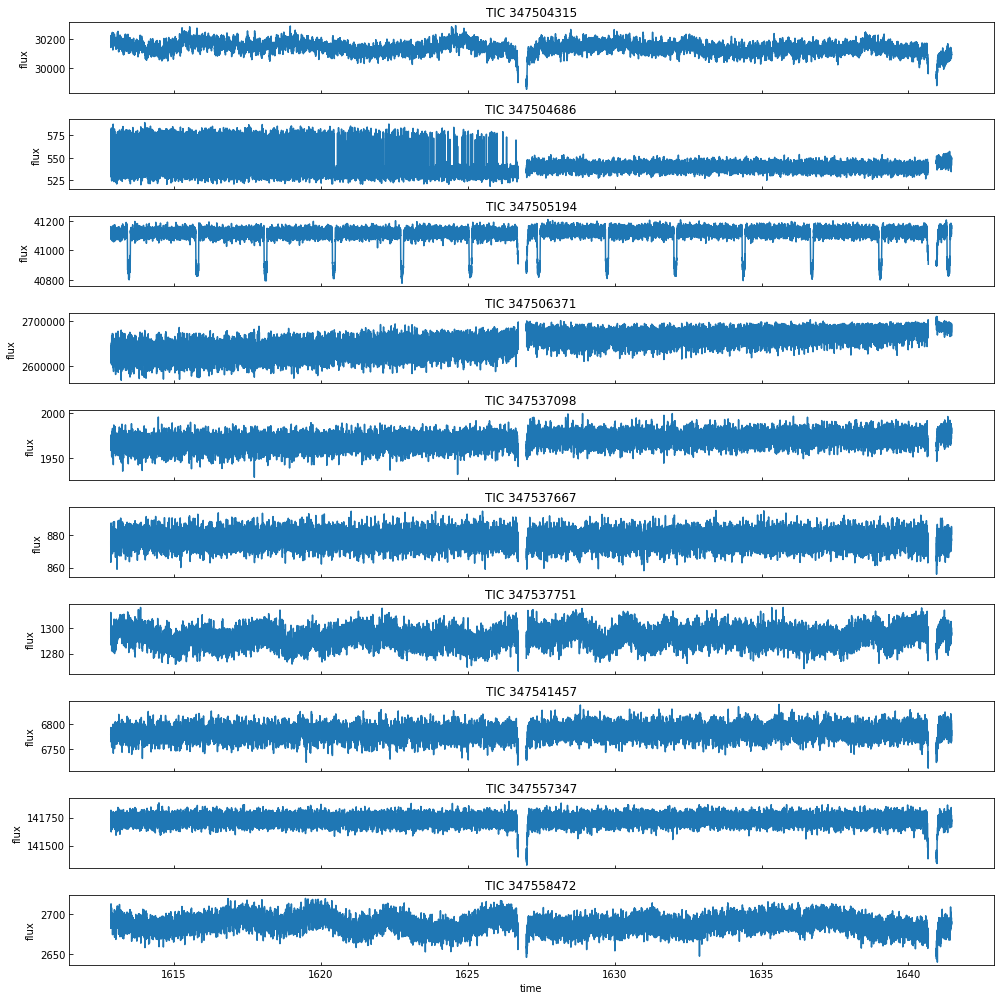

In [35]:
m=170

fig, ax = pl.subplots(10,1,figsize=(14,14), sharex=True)

n=0
for i in file_list[m-10:m]:
    data=fits.getdata(i)
    hdr =fits.getheader(i)
    tic_id = hdr['OBJECT']
    
    t,f,e,b,x1,x2 = get_data(data)
    
    ax[n].plot(t,f)
    ax[n].set_title(tic_id)
    ax[n].set_ylabel('flux')
    n+=1
ax[-1].set_xlabel('time')
fig.tight_layout()